📕👌 **Book  Recommendation System**


---



𓂃🖊 **Dataset used ⭢** goodbooks-10k

https://github.com/zygmuntz/goodbooks-10k 🗂️


---




**Importing Libraries**

In [3]:
!pip install faiss-cpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 43.9 MB/s eta 0:00:00


In [4]:
import pandas as pd # process and analyze data in the form of tables (DataFrames)
import numpy as np # for numerical operations, and for dealing with matrices
from sentence_transformers import SentenceTransformer # import from it a ready model for converting texts to embeddings => (numerical representation)
import faiss # fast search in vector space
from sklearn.metrics.pairwise import cosine_similarity # calculating similarity between vectors

In [5]:
from google.colab import files
uploaded = files.upload()

Saving book_tags.csv to book_tags.csv
Saving books.csv to books.csv
Saving ratings.csv to ratings.csv
Saving tags.csv to tags.csv


**Data Loading**

In [6]:
df_books = pd.read_csv('books.csv')
df_ratings = pd.read_csv('ratings.csv')
df_book_tags = pd.read_csv('book_tags.csv')
df_tags = pd.read_csv('tags.csv')

**Data Analysis**

---
1. Data overview


In [7]:
# Show the first 5 rows of each file
print(' Books:')
display(df_books.head())

print('\n Ratings:')
display(df_ratings.head())

print('\n Book Tags:')
display(df_book_tags.head())

print('\n Tags:')
display(df_tags.head())

 Books:


,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...



 Ratings:


,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3



 Book Tags:


,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716



 Tags:


,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


2. Basic information about each table

In [8]:
print('Books Info:')
display(df_books.info())

print('\n Ratings Info:')
display(df_ratings.info())

print('\n Books Tags Info:')
display(df_book_tags.info())

print('\n Tags Info:')
display(df_tags.info())

Books Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 no

None


 Ratings Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   book_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 136.8 MB


None


 Books Tags Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   goodreads_book_id  999912 non-null  int64
 1   tag_id             999912 non-null  int64
 2   count              999912 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


None


 Tags Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tag_id    34252 non-null  int64 
 1   tag_name  34252 non-null  object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB


None

3. Check for missing values

In [9]:
print('Books Missing Values:')
display(df_books.isnull().sum())

print('\n Ratings Missing Values:')
display(df_ratings.isnull().sum())

print('\n Books Tags Missing Values:')
display(df_book_tags.isnull().sum())

print('\n Tags Missing Values:')
display(df_tags.isnull().sum())

Books Missing Values:


,0
book_id,0
goodreads_book_id,0
best_book_id,0
work_id,0
books_count,0
isbn,700
isbn13,585
authors,0
original_publication_year,21
original_title,585



 Ratings Missing Values:


,0
user_id,0
book_id,0
rating,0



 Books Tags Missing Values:


,0
goodreads_book_id,0
tag_id,0
count,0



 Tags Missing Values:


,0
tag_id,0
tag_name,0




---



---









**Exploratory data analysis : books.csv**

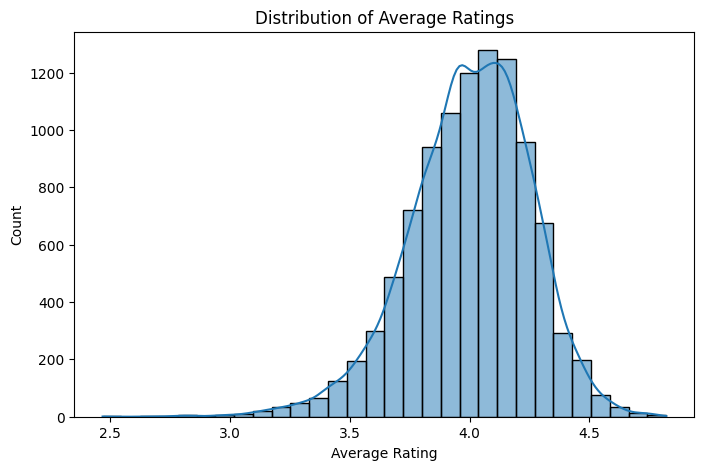

In [10]:
# Analyze reviews
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df_books['average_rating'], bins=30, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.show()

In [11]:
# Analysis of the Most Frequent Authors
df_books['authors'].value_counts().head(10) # value_counts():Ascending order

,count
authors,
Stephen King,60
Nora Roberts,59
Dean Koontz,47
Terry Pratchett,42
Agatha Christie,39
Meg Cabot,37
James Patterson,36
David Baldacci,34
John Grisham,33


,count
language_code,
eng,6341
en-US,2070
en-GB,257
ara,64
en-CA,58
fre,25
ind,21
spa,20
ger,13


<Axes: title={'center': 'Top Languages'}, xlabel='language_code'>

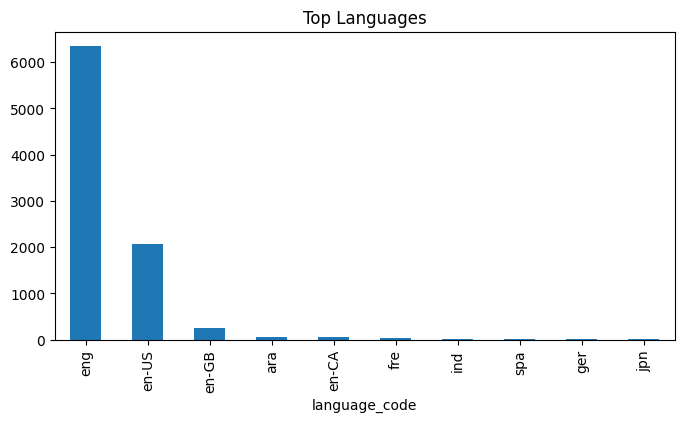

In [12]:
# Language Analysis
display(df_books['language_code'].value_counts().head(10))
display(df_books['language_code'].value_counts().head(10).plot(kind='bar', figsize=(8, 4), title='Top Languages'))

🔸 Result:

This observation has led me to consider focusing the system on English-language books 🗽 due to their availability ..

---



---



**Advanced Data Cleaning + Feature Engineering**

* Removing unnecessary columns
* Deleting rows that don't have a title or rating
* focus only on English books, so i will removing books that are not written in English




In [13]:
# Select only important columns and drop rows with missing values
df_books_cleaned = df_books[['book_id', 'title', 'authors', 'average_rating', 'language_code']].dropna()
# Filter data to include only English-language books
df_books_cleaned = df_books_cleaned[df_books_cleaned['language_code']=='eng']
# Reset index for a clean, sequential dataset
df_books_cleaned.reset_index(drop=True, inplace=True)
# Display the cleaned dataset
df_books_cleaned

,book_id,title,authors,average_rating,language_code
0,1,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,eng
1,2,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",4.44,eng
2,4,To Kill a Mockingbird,Harper Lee,4.25,eng
3,5,The Great Gatsby,F. Scott Fitzgerald,3.89,eng
4,6,The Fault in Our Stars,John Green,4.26,eng
...,...,...,...,...,...
6336,9995,"Billy Budd, Sailor",Herman Melville,3.09,eng
6337,9996,"Bayou Moon (The Edge, #2)",Ilona Andrews,4.09,eng
6338,9997,"Means of Ascent (The Years of Lyndon Johnson, #2)",Robert A. Caro,4.25,eng
6339,9998,The Mauritius Command,Patrick O'Brian,4.35,eng




---



---



**Embeddings and BERT** :



*   Embeddings is a numerical (vector) representation of the text
*   Each book will be represented as a 'point' within dimensional Space
*   Books with similar meanings will be closer together within this space



i will use **SentenceTransformers Library** it use **BERT model**

https://huggingface.co/sentence-transformers

🔸 Result:

 get word_embeddings



---


Then, I will use **FAISS (Facebook AI Similarity Search )**, a library designed for quickly finding the most similar books (i.e., recommendations) based on the embeddings that have been generated

**The tool used:**
**faiss.IndexFlatL2()**: it's a type of FAISS index (this index sorts vectors in an intelligent way (e.x: tree or partitions), and when someone ask about specific vector, it quickly returns the closest vectors to it

https://github.com/facebookresearch/faiss/wiki/getting-started

🔸 Result:

When I give it a vector representation, it will return the N closest books to it in terms of similarity (i.e. recommendations)


In [48]:
# Load a pretrained Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# The sentences to encode
# Create a text representation of each book (e.g, The Hobbit by J.R.R Tolkien)
book_corpus = df_books['title'] + ' by ' + df_books['authors']
"""
Combining the title and author creates detailed and unique text descriptions, enhancing embeddings quality for better representation
"""

# Calculate embeddings by calling model.encode()
book_embeddings = model.encode(book_corpus.tolist(), show_progress_bar=True)
print(book_embeddings.shape)

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

(10000, 384)


🔸 Result:

each book is converted to a vector of 384 dimenstions



---


**FAISS :**

In [15]:
!pip install faiss-cpu


In [16]:
# Verify the data type of embeddings : FAISS must take float32
book_embeddings = book_embeddings.astype('float32')

"""
Embeddings in this step (model.encode(book_corpus)) return NumPy array and it's elements type are float64,
FAISS only works with data type float32, using float64 with FAISS will cause an error⚠️
"""


"\nEmbeddings in this step (model.encode(book_corpus)) return NumPy array and it's elements type are float64,\nFAISS only works with data type float32, using float64 with FAISS will cause an error⚠️\n"

In [17]:
# Build the FAISS index
# shape[1] : Number of dimensions per embedding
# IndexFlatL2 : Build index and it's using L2 distance to calculate the similarity
index = faiss.IndexFlatL2(book_embeddings.shape[1])

# add all the embeddings to the index
index.add(book_embeddings)


🔸 Result:

I have now created a searchable FAISS index using the book embeddings
This means i can do something like:

 "Here is a vector representing a user who loves reading History and Mystery books — give me the most similar books." 🧐📚

The index will return the closest matches based on vector distances (っ'-')╮ =͟͟͞͞ 📕





---
**Searching the Index — Get Similar Books !**

After building the FAISS index, I'll use it to search for the closest books to a specific one — either based on a selected book or a specific interest

The simplest scenario is:

🙋🏻‍♂️ "Give me the most similar books to a specific book from the dataset."

For example, I'll choose a book by its title and retrieve the 5 closest books to it.





In [18]:
# Pick a book title to find similar ones
book_id = 12 # can change this to any book ID
print('Book Title:', df_books_cleaned.iloc[book_id]['title'])

# Get the embedding for the chosen book
embedding = df_books_cleaned.iloc[book_id]['title']
embedding = model.encode([embedding])

# distance : Contains the distances between the embedding and the matching books
# indices : Contains the indexes of the nearest k elements (books) in the data. Each number in it is the index in the original DataFrame
# (Top 5 similar books) => Search the index for top 6 similar books (including itself as top match, then i will delete it, so it will be 5 again :) ) : search is a FAISS function
distence, indices = index.search(embedding, k=6)

# remove the first result (the same book)
similar_indices = indices[0][1:] # start from the second book

# Display results
print("\nTop 5 similar books:")
# enumerate() : build-in function using with loop, provides 2 things at once, (the index inside the loop, the same item at that position)
for i, idx in enumerate(similar_indices):
    title = df_books.iloc[idx]['title']
    author = df_books.iloc[idx]['authors']
    print(f"{i+1}. {title} by {author}")



Book Title: The Girl with the Dragon Tattoo (Millennium, #1)

Top 5 similar books:
1. The Girl with the Lower Back Tattoo by Amy Schumer
2. Dragon Actually (Dragon Kin, #1) by G.A. Aiken
3. Dragonfly in Amber (Outlander, #2) by Diana Gabaldon
4. Dragon Prince (Dragon Prince, #1) by Melanie Rawn
5. Dragon Rider (Dragon Rider, #1) by Cornelia Funke




---



---
**Next step: Search based on user preferences** 🙇‍♀️

Instead of choosing a book and looking for similar ones, i'll run a query using a description (prompt)

That is, "I love mystery and history books. What do you recommend I read ?" 🤷🏻‍♀️📚


In [19]:
# Example of user interest 📜⌛🏛️🏺
user_query = 'I enjoy reading mystery and history books. What book do you recommend ?'
# Convert the query to embedding
# convert the statement i wrote (user_query) to embedding using the same model i used previously (MiniLM), result is vector, and using float32 for FAISS
user_embedding = model.encode([user_query]).astype('float32')

# Search the index for top 5 similar books
distence, indices = index.search(user_embedding, k=5)

# display result
print('Top 5 book recommendations based on user interest:')
for i, idx in enumerate(indices[0]):
  title = df_books.iloc[idx]['title']
  author = df_books.iloc[idx]['authors']
  print(f'{i+1}.{title} by {author} ')

Top 5 book recommendations based on user interest:
1.Savannah Breeze (Weezie and Bebe Mysteries, #2) by Mary Kay Andrews 
2.Mystery (Alex Delaware, #26) by Jonathan Kellerman 
3.The Book of Strange New Things by Michel Faber 
4.The Adventures of Sherlock Holmes by Arthur Conan Doyle 
5.The Memoirs of Sherlock Holmes by Arthur Conan Doyle 




---
" I enjoy reading mystery and history books. What book do you recommend ? "

**How does this sentence turn into results ?**

* This is a natursl language sentence, it doesn't contains the title of a book, but the reader preferences

* I convert this sentence to vector (Embedding), using all-MiniLM-L6-v2 model

* the sentence will convert to vector (length:384), these numbers not just a number, it's 'meaningful' representation of the full meaning of the sentence, because the model is trained to understand meanings, not just words ...

* The model knows that 'mystery' & 'history' are interests can found in books

* Compare the sentence with all books using :

   distances, indices = index.search(query_embedding, k=5)

   The system will compare the sentence with all 10,000 books by calculating the distance between the sentence vector and each book vector

    🔎 Close distance = high similarity

    🔕 Far distance = low similarity


---




**Another Try**


In [20]:
# Example of user interest 💚🏕️🌿🌲🌳☘️
user_query = 'I am looking for books about plants, trees and nature. I love agricultural engineering.'
# Convert the query to embedding
# convert the statement i wrote (user_query) to embedding using the same model i used previously (MiniLM), result is vector, and using float32 for FAISS
user_embedding = model.encode([user_query]).astype('float32')

# Search the index for top 5 similar books
distence, indices = index.search(user_embedding, k=5)

# display result
print('Top 5 book recommendations based on user interest:')
for i, idx in enumerate(indices[0]):
  title = df_books.iloc[idx]['title']
  author = df_books.iloc[idx]['authors']
  print(f'{i+1}.{title} by {author} ')

Top 5 book recommendations based on user interest:
1.The Bean Trees (Greer Family, #1) by Barbara Kingsolver 
2.The Education of Little Tree by Forrest Carter 
3.The Tale of Three Trees by Angela Elwell Hunt, Tim Jonke 
4.The Plum Tree by Ellen Marie Wiseman 
5.The Kingmaker's Daughter (The Plantagenet and Tudor Novels, #4) by Philippa Gregory, Mirjana Valent 




---



---

**🕸️ Neural Network**

This neural network will learn the relationship between the book-embeddings and the readers' ratings

* input : book-embedding (size:384)
* output : the models prediction for this book (usually number between 0 and 5)

**book_embedding → neural network → predicted_rating**

**Integrating Reviewes and Embeddings**

🔸 Result:

More Accurate Recommendations, The goal here is to combine data derived from embeddings with reviewes collected from users



In [21]:
# merge ratings with book data based on book_id
df_books_ratings = pd.merge(df_books_cleaned, df_ratings, on='book_id', how='left')
# keep all data from the first (left) table, if it find a match in the book_id from the df_ratings table, add it, if don't set it to NaN
df_books_ratings.head()


,book_id,title,authors,average_rating,language_code,user_id,rating
0,1,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,eng,2886,5
1,1,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,eng,6158,5
2,1,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,eng,3991,4
3,1,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,eng,5281,5
4,1,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,eng,5721,5


**Data preparation :**

In [22]:
# Delete missing ratings from the DataFrame
# It's important to use subset=['rating'] because dropna() by itself deletes any row that has a NaN in any column. But with subset=['rating'], it only removes rows where the rating is missing
df_books_ratings = df_books_ratings.dropna(subset=['rating'])

# Reset index in df_books_ratings and book_embeddings
df_books_ratings.reset_index(drop=True, inplace=True)

# only select the embeddings that match the books that have ratings => embeddings here is the rows left over after deletion
book_embeddings = book_embeddings[:len(df_books_ratings)]

# Extract ratings from a DataFrame and convert them to a NumPy array
ratings = df_books_ratings['rating'].values


**Build the Neural Network Model using keras :**

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(book_embeddings.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer: single value prediction (rating)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)




---

**Train the model**



In [24]:
# Train the model
# model.fit(book_embeddings, ratings, epochs=15, batch_size=64, validation_split=0.1)
# validation_split=0.1 : To detect overfitting
# Training Set (90%) : the model learns from it
# Validation Set (10%) : to measure the model performance on this set during training, to determine if it's 'memorizing' the data or actually 'understanding' it

🔸 Result :

**Overfitting**

* The following model was trained without regularization
*  While it performed well on training data, it showed signs of overfitting (val_mae significantly higher than train_mae)
*  Therefore, I decided to improve it with some regularization techniques



---


**🔸 Second Try — Time to Tame the Model 🤠🌱**

**Fixing the Overfit** → Using Dropout → improved generalization

 **Fixing the Overfit** → With EarlyStopping → Stopped just in time

In [25]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(book_embeddings.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1) # Output layer — only one value because i expect a number (Rating)
])
# Dropout(0.3) : This layer randomly drops 30% of the units each training run, forcing the model not to rely on only certain features — it encourages generalization

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Early stopping
early_stop = EarlyStopping(patience=6, restore_best_weights=True)
# patience=3 : Wait 3 epochs after the last improvement before stopping
# restore_best_weights=True : If performance starts to deteriorate, the model automatically reverts to the best version it has reached

# Train the model
model.fit(book_embeddings, ratings, epochs=40, batch_size=32, validation_split=0.1,callbacks=[early_stop])

Epoch 1/40
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 4.7305 - mae: 1.6074 - val_loss: 1.1272 - val_mae: 0.7769
Epoch 2/40
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.3020 - mae: 0.8364 - val_loss: 1.0428 - val_mae: 0.7572
Epoch 3/40
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.1914 - mae: 0.8079 - val_loss: 1.0017 - val_mae: 0.7533
Epoch 4/40
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.1034 - mae: 0.7811 - val_loss: 0.9730 - val_mae: 0.7464
Epoch 5/40
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.0642 - mae: 0.7797 - val_loss: 0.9614 - val_mae: 0.7421
Epoch 6/40
282/282 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 1.0388 - mae: 0.7764 - val_loss: 0.9471 - val_mae: 0.7420
Epoch 7/40
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.9738 - mae: 0.7432 - val_loss: 0.9224 - val_mae: 0.7428
Epoch 8/40
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9677 - mae: 0.7453 - val_loss: 0.9190 - val_mae: 0.7439
Epoch 9/40
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step -

🔸 Result:

The model stopped at optimal epoch berfore overfitting started creeping in

Validation MAE stayed low and stable



---

**Generating new predictions from the trained model**

In [26]:
# Predict the ratings for each book
predicted_ratings = model.predict(book_embeddings)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [27]:
# Filter embeddings to match books in df_books_cleaned
book_embeddings_cleaned = book_embeddings[df_books_cleaned.index]

# Use the model to predict ratings based on embeddings
predicted_ratings_cleaned = model.predict(book_embeddings_cleaned)

# Add predicted ratings to the DataFrame
df_books_cleaned.loc[:, 'predicted_rating'] = predicted_ratings_cleaned


199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [28]:
# The books in df_books_cleaned are sorted based on the predicted_rating column in descending order
recommended_books = df_books_cleaned.sort_values(by='predicted_rating', ascending=False)

# Extract important columns from recommended_books and Show the first 10 books
recommended_books[['title', 'authors', 'predicted_rating']].head(15)


,title,authors,predicted_rating
2328,"The Third Option (Mitch Rapp, #4)",Vince Flynn,4.932799
2102,A Hunger Like No Other (Immortals After Dark #2),Kresley Cole,4.901548
2019,Eugene Onegin,"Alexander Pushkin, James E. Falen",4.732485
1414,Squirrel Seeks Chipmunk: A Modest Bestiary,"David Sedaris, Ian Falconer",4.729986
5839,"Where I Belong (Alabama Summer, #1)",J. Daniels,4.726085
4727,"The Beast (Black Dagger Brotherhood, #14)",J.R. Ward,4.708436
628,Twelfth Night,William Shakespeare,4.701771
320,"I, Robot (Robot #0.1)",Isaac Asimov,4.667215
4247,"Shall We Tell the President? (Kane & Abel, #3)",Jeffrey Archer,4.654381
4557,The Servants of Twilight,"Leigh Nichols, Dean Koontz",4.654071




---



---



**Filter recommendations by type**

In [29]:
# Merge tables based on tag_id, this add tag_name to df_book_tags
df_book_tags = df_book_tags.merge(df_tags, on="tag_id", how="left")

In [30]:
print(df_book_tags.columns)


Index(['goodreads_book_id', 'tag_id', 'count', 'tag_name'], dtype='object')


In [32]:
df_book_tags = df_book_tags.merge(df_tags, on="tag_id", how="left")



---



Extract the most popular tags for each book : Combine different tags into one series for each book

In [33]:
# This code groups the book tags by their Goodreads book ID, selects the top 5 tags for each book,
# and renames the column to 'genre' to reflect the book's genre tags

top_tags_per_book = df_book_tags.groupby("goodreads_book_id")['tag_name_x'] \
                                .apply(lambda x: ', '.join(x.head(5))) \
                                .reset_index()

top_tags_per_book.rename(columns={'tag_name_x': 'genre'}, inplace=True)

In [34]:
print(df_books_cleaned.columns)


Index(['book_id', 'title', 'authors', 'average_rating', 'language_code',
       'predicted_rating'],
      dtype='object')


In [35]:
df_books_cleaned = df_books_cleaned.merge(top_tags_per_book, left_on='book_id', right_on='goodreads_book_id', how='left')


Sorts books by predicted rating in descending order to get top recommendations


In [36]:
recommended_books = df_books_cleaned.sort_values(by='predicted_rating', ascending=False)

Print The most popular genres

In [37]:
print("The most popular (genres):")
print(df_books_cleaned['genre'].value_counts().head(20))

The most popular (genres):
genre
to-read, mystery, janet-evanovich, fiction, humor                     8
to-read, fantasy, young-adult, vampires, horror                       6
to-read, currently-reading, classics, fiction, favorites              6
to-read, fiction, currently-reading, favorites, contemporary          5
to-read, science-fiction, sci-fi, currently-reading, fiction          5
to-read, classics, historical-fiction, childrens, fiction             3
to-read, fantasy, redwall, fiction, young-adult                       3
to-read, mystery, fiction, africa, currently-reading                  3
to-read, fiction, currently-reading, favorites, 1001-books            3
to-read, classics, currently-reading, fiction, favorites              3
to-read, fiction, james-bond, thriller, currently-reading             3
to-read, classics, fiction, currently-reading, classic                3
to-read, fiction, currently-reading, favorites, historical-fiction    3
to-read, currently-reading, fic

Filter by desired type (e.g. 'Fantasy')

In [38]:
# Filters the recommended books by genre keyword and returns the top N based on predicted rating
def filter_books_by_genre(genre_keyword, top_n=10):
    filtered = recommended_books[recommended_books['genre'].str.contains(genre_keyword, case=False, na=False)]
    return filtered[['title', 'authors', 'genre', 'predicted_rating']].head(top_n)

# This gives the top 10 Fantasy books (default n value) based on the user's predicted rating
filter_books_by_genre("Fantasy")

,title,authors,genre,predicted_rating
2913,Inside Out & Back Again,Thanhha Lai,"fantasy, favorites, to-read, fiction, urban-fa...",4.411837
5706,Twelfth Grade Kills (The Chronicles of Vladimi...,Heather Brewer,"to-read, fantasy, young-adult, vampires, horror",4.406455
3307,Chopsticks,"Jessica Anthony, Rodrigo Corral","to-read, fantasy, currently-reading, sword-of-...",4.402024
5133,"Safe with Me (With Me in Seattle, #5)",Kristen Proby,"to-read, fantasy, redwall, young-adult, owned",4.391489
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"to-read, fantasy, favorites, currently-reading...",4.390370
4331,"Dark Magic (Dark, #4)",Christine Feehan,"to-read, childrens, fantasy, fiction, children",4.377367
5705,The Red House,Mark Haddon,"to-read, fantasy, young-adult, vampires, horror",4.373709
2650,Deliverance,James Dickey,"to-read, fantasy, sf, favorites, currently-rea...",4.361332
5119,Born to Run,Bruce Springsteen,"to-read, fantasy, redwall, fiction, young-adult",4.349793
5113,Finding the Dream (Dream Trilogy #3),Nora Roberts,"fantasy, to-read, fiction, alternate-history, ...",4.329959


In [39]:
# Removes common non-genre tags (like 'to-read') from the 'genre' column to create a cleaner genre list

# A list of tags that you shouldn't consider as true book genres. These are general or personal terms, not true literary genres
stop_tags = ['to-read', 'currently-reading', 'favorites', 'owned']

# The result is stored in a new column called cleaned_genre
df_books_cleaned['cleaned_genre'] = df_books_cleaned['genre'].apply(
    lambda x: ', '.join([tag for tag in x.split(', ') if tag not in stop_tags]) if pd.notnull(x) else x
                                                    # Only keep types that are not in stop_tags
)


In [40]:
def filter_books_by_genre(genre_keyword, top_n=10):
    filtered = recommended_books[recommended_books['cleaned_genre'].str.contains(genre_keyword, case=False, na=False)]
    return filtered[['title', 'authors', 'cleaned_genre', 'predicted_rating']].head(top_n)
  # recommended_books is DataFrame containing books sorted by predicted_rating, from H->L
  # this code filters books so that only rows are retained that:
  # cleaned_grnre column contains a genre_keyword, and it doesn't matter if the word is capital or lowercase (case=False),
  # and if the value is empty it will not be counted, so as not to generate an error (na=False)

  # returning results after filtering

In [41]:
# This displays the first 10 rows of two columns:
# genre (original genre, which sometimes contain unhelpful words), cleaned_genre (the genre after they've been cleaned of generic words like "to-read","owned")
df_books_cleaned[['genre', 'cleaned_genre']].head(10)


,genre,cleaned_genre
0,"to-read, fantasy, favorites, currently-reading...","fantasy, young-adult"
1,"to-read, currently-reading, fantasy, favorites...","fantasy, children"
2,NaN,NaN
3,"favorites, fantasy, currently-reading, young-a...","fantasy, young-adult"
4,"fantasy, young-adult, fiction, harry-potter, o...","fantasy, young-adult, fiction, harry-potter"
5,"to-read, favorites, fantasy, currently-reading...","fantasy, harry-potter"
6,"to-read, favorites, fantasy, currently-reading...","fantasy, fiction"
7,"to-read, currently-reading, science-fiction, f...","science-fiction, sci-fi"
8,NaN,NaN
9,"to-read, currently-reading, favorites, science...","science-fiction, sci-fi"


🔸 Result:



*   Cleans up genres of useless words
*   Filters books based on clean and useful genres
*   Shows more accurate recommendations to the user






In [42]:
# Counter from collections library : → "to count how many times each type (genre) occurs"
from collections import Counter

# delete (NaN) values from cleaned_genre, each cell is divided into a list of words using ',' (separator)
all_tags = df_books_cleaned['cleaned_genre'].dropna().str.split(', ') # Result: A list of lists, example: 'Fantasy, Magic' → ['Fantasy', 'Magic']
# Flattening lists : It is the breaking down of small lists and combining them into a single list => example: all_tags = [['Fantasy', 'Magic'], ['Romance'], ['Drama', 'Action']]
# flat_tags → ['Fantasy', 'Magic', 'Romance', 'Drama', 'Action']
flat_tags = [tag for sublist in all_tags for tag in sublist]
# Counts the number of times each genre is repeated
tag_counts = Counter(flat_tags)
# counter result : [('Fantasy', 1), ('Magic', 1), ('Romance', 1), ('Drama', 1), ('Action', 1)]



print(tag_counts.most_common(20))
# most_common : counter function, return list of tuples, each tuple contains (the word or element ), number of times it's repeated (descending)
# n : is the number of results i want to return

[('fiction', 334), ('classics', 105), ('non-fiction', 101), ('fantasy', 57), ('historical-fiction', 49), ('mystery', 46), ('nonfiction', 41), ('young-adult', 37), ('science-fiction', 35), ('books-i-own', 32), ('sci-fi', 30), ('humor', 29), ('classic', 27), ('thriller', 22), ('childrens', 21), ('memoir', 20), ('history', 19), ('romance', 17), ('literature', 15), ('biography', 15)]


In [43]:
# Copy cleaned genre tags into the recommended_books dataframe
recommended_books['cleaned_genre'] = df_books_cleaned['cleaned_genre']

In [44]:
# Filter recommended books that contain the keyword "Fantasy" in their genre
filter_books_by_genre("Fantasy")

,title,authors,cleaned_genre,predicted_rating
2913,Inside Out & Back Again,Thanhha Lai,"fantasy, fiction, urban-fantasy",4.411837
5706,Twelfth Grade Kills (The Chronicles of Vladimi...,Heather Brewer,"fantasy, young-adult, vampires, horror",4.406455
3307,Chopsticks,"Jessica Anthony, Rodrigo Corral","fantasy, sword-of-truth",4.402024
5133,"Safe with Me (With Me in Seattle, #5)",Kristen Proby,"fantasy, redwall, young-adult",4.391489
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"fantasy, young-adult",4.390370
4331,"Dark Magic (Dark, #4)",Christine Feehan,"childrens, fantasy, fiction, children",4.377367
5705,The Red House,Mark Haddon,"fantasy, young-adult, vampires, horror",4.373709
2650,Deliverance,James Dickey,"fantasy, sf",4.361332
5119,Born to Run,Bruce Springsteen,"fantasy, redwall, fiction, young-adult",4.349793
5113,Finding the Dream (Dream Trilogy #3),Nora Roberts,"fantasy, fiction, alternate-history",4.329959


🔸 Result:

A table showing the best books (according to predicted_rating ⭐) whose genre


contains "Fantasy," with the following columns:



title, authors, cleaned_genre, predicted_rating


---



---



**Multi-Mode Book Recommendation System (Text, Title, Genre)**

In [52]:
import pandas as pd

# Suggest books based on user interest through a sentence they type
def recommend_books_by_sentence():
    while True:
        user_input = input("💬 Enter a sentence that describes your interest (e.g., I love mystery and history books):\n")
        embedding = model.encode([user_input]).astype('float32') # This sentence is transformed into a numerical representation (embedding) using a deep learning model (SentenceTransformer)
        dist, indices = index.search(embedding, k=5) # index.search uses the FAISS library to find the nearest books
        # Print titles and authors of suggested books
        print("\n📚 Recommended books:")
        for i, idx in enumerate(indices[0]):
            title = df_books.iloc[idx]['title']
            author = df_books.iloc[idx]['authors']
            print(f"{i+1}. {title} by {author}")

        continue_choice = input("\n🔁 Would you like to try again with another sentence? (yes/no):\n")
        if continue_choice.lower() != 'yes':
            break

# Suggest books similar to a book the user is writing
def recommend_similar_books_by_title():
    while True:
        title_input = input("📖 Enter the title of a book (or type 'exit' to quit):\n") # Data is being searched for a book containing this title
        if title_input.lower() in ['exit', 'quit']:
            print("👋 Exiting book-based recommendation.\n")
            break

        # Find the closest match for the title
        matched_books = df_books_cleaned[df_books_cleaned['title'].str.contains(title_input, case=False, na=False)]

        if matched_books.empty:
            print("❌ No matching books found. Try a different title.\n")
            continue

        # Display the first match
        book = matched_books.iloc[0]
        book_title = book['title']
        print(f"\n📖 Selected book: {book_title}")

        # Create embedding for the title and search for similar books
        embedding = model.encode([book_title]).astype('float32')
        dist, indices = index.search(embedding, k=6) # If title found, the title is converted to embedding, and then FAISS is used to find similar books.
        similar_indices = indices[0][1:]  # skip the book itself

        print("\n📚 Similar books:")
        for i, idx in enumerate(similar_indices):
            title = df_books.iloc[idx]['title']
            author = df_books.iloc[idx]['authors']
            print(f"{i+1}. {title} by {author}")

        continue_choice = input("\n🔁 Would you like to try another title? (yes/no):\n")
        if continue_choice.lower() != 'yes':
            break

# Giving recommendations based on the book's genre or expected rating
"""
🧠 Mechanism:
[1] In the case of genre:
The user selects a genre, such as "Fantasy."

Books are filtered by this genre.

Unhelpful categories, such as "to-read," are excluded

The highest-rated books in the desired genre are displayed

[2] In the case of rating:
The user selects the number of highest-rated books they want to see

These books are displayed based on their predicted rating.
"""
def recommend_by_genre_or_rating():
    while True:
        choice = input("🎯 Filter by [1] Genre or [2] Rating? Enter the number (or type 'exit' to quit):\n")
        if choice.lower() in ['exit', 'quit']:
            print("👋 Exiting genre or rating-based recommendation.\n")
            break
        if choice == '1':
            genre = input("🧙‍♀️ Enter a genre (e.g., Fantasy):\n")
            top_n = int(input("🔝 How many results do you want?\n"))
            stop_tags = ['to-read', 'currently-reading', 'favorites', 'owned']
            # This step cleans up the categories to remove useless categories from the type
            df_books_cleaned['cleaned_genre'] = df_books_cleaned['genre'].apply(
                lambda x: ', '.join([tag for tag in x.split(', ') if tag not in stop_tags]) if pd.notnull(x) else x
            )
            recommended = df_books_cleaned[
                df_books_cleaned['cleaned_genre'].str.contains(genre, case=False, na=False)
            ].sort_values(by='predicted_rating', ascending=False).head(top_n)
            print("\n📚 Top books in selected genre:")
            for i, row in recommended.iterrows():
                print(f"{row['title']} by {row['authors']} - ⭐ {row['predicted_rating']:.2f}")

            continue_choice = input("\n🔁 Would you like to try another genre or rating filter? (yes/no):\n")
            if continue_choice.lower() != 'yes':
                break
        elif choice == '2':
            top_n = int(input("🔝 How many top-rated books do you want?\n"))
            recommended = df_books_cleaned.sort_values(by='predicted_rating', ascending=False).head(top_n)
            print("\n📚 Top rated books:")
            for i, row in recommended.iterrows():
                print(f"{row['title']} by {row['authors']} - ⭐ {row['predicted_rating']:.2f}")

            continue_choice = input("\n🔁 Would you like to try another genre or rating filter? (yes/no):\n")
            if continue_choice.lower() != 'yes':
                break
        else:
            print("❌ Invalid choice. Please enter '1' for genre or '2' for rating.\n")

# -------- Main Menu --------
# This is the basic user interface, it's displays a list of options and directs the user to the appropriate function
def main_menu():
    while True:
        print("🤖 Interactive Book Recommendation System")
        print("Choose a recommendation mode:")
        print("1️⃣ Based on your own sentence/interest")
        print("2️⃣ Based on a similar book (by title)")
        print("3️⃣ Based on genre or rating")

        option = input("Enter option number (or type 'exit' to quit):\n")
        if option.lower() in ['exit', 'quit']:
            print("👋 Exiting recommendation system.")
            break
        elif option == '1':
            recommend_books_by_sentence()
        elif option == '2':
            recommend_similar_books_by_title()
        elif option == '3':
            recommend_by_genre_or_rating()
        else:
            print("❌ Invalid option. Please select a valid option.")

# Call the main menu
main_menu()


🤖 Interactive Book Recommendation System
Choose a recommendation mode:
1️⃣ Based on your own sentence/interest
2️⃣ Based on a similar book (by title)
3️⃣ Based on genre or rating
Enter option number (or type 'exit' to quit):
1
💬 Enter a sentence that describes your interest (e.g., I love mystery and history books):
I am looking for tragic novels

📚 Recommended books:
1. Fun Home: A Family Tragicomic by Alison Bechdel
2. Misery by Stephen King
3. The Complete Novels by Jane Austen
4. Madeline's Rescue by Ludwig Bemelmans
5. Dawn of the Dreadfuls (Pride and Prejudice and Zombies, #0.5) by Steve Hockensmith, Jane Austen, Patrick Arrasmith

🔁 Would you like to try again with another sentence? (yes/no):
yes
💬 Enter a sentence that describes your interest (e.g., I love mystery and history books):
I am looking for political books

📚 Recommended books:
1. America (The Book): A Citizen's Guide to Democracy Inaction by Jon Stewart, Ben Karlin, David Javerbaum, Rich Bloomquist, Steve Bodow, Tim C